# Project: Guess a Celebrity

## 1. Problem Statement

You and your team are working on improving your facial recognition service. Your company has received a request to use the service you developed at an IT conference where these famous people will be speaking.

To do this, we will train a five-class classifier using the full power of pre-trained networks.

**Main project goals:**
* Solving a multi-class classification problem;
* Using the principle of transfer learning;
* Visualization of data and the model's predictions.

## 2. Import Libraries and Define Constants

In [22]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

import torch
import torchvision
from torchvision.datasets import ImageFolder

BATCH_SIZE = 64
random_state = 42

# Check if Apple MPS is available
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")


## 3. Load Data

Identify the number of images in the training dataset.

In [11]:
!find data/train/ -type f | wc -l

    3001


The training dataset contains 3000 images. Which is not much compared to the number of images in the ImageNet dataset used to train the pre-trained models.

The scenario can be classified as a small dataset mainly different to what the base network to be used was trained on (since ImageNet is restricting human images).

I will use the following pattern:
1. Remove the last layer of the fully connected network and several CNN layers at the end of the network.
2. Add a new fully connected layer with an output size equal to the number of classes in the new dataset.
3. Freeze all weights from the remaining pre-trained CNN.
4. Update the weights of the new fully connected layer during training.

In [13]:
!find data/valid/ -type f | wc -l

     914


The validation dataset contains 914 images. That constitutes around 23 % of the whole dataset, which is a good ratio.

Loading train and validation datasets using the class `ImageFolder` from the `TorchVision` library.

In [18]:
train_dataset = ImageFolder("data/train/")
valid_dataset = ImageFolder("data/valid/")

# Output one sample from the training dataset
train_dataset[0]

(<PIL.Image.Image image mode=RGB size=70x70>, 0)

The image has the class `PIL.Image` and also there is a class label of the sample. Let's take a look at the class name and the image itself.

bill_gates


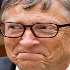

In [21]:
print(train_dataset.classes[train_dataset[0][1]])
train_dataset[0][0]

The label `0` corresponds to the class `bill_gates` and the image is a picture of Bill Gates.

Let's define a function which will render random images from a dataset.

In [23]:
def plot_samples(dataset, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(16, 8))

    for i in range(num_samples):
        random_image, random_class = random.choice(dataset)
        random_label = dataset.classes[random_class]
        axes[i].imshow(random_image)
        axes[i].set_title(random_label.replace("_", " "))
        axes[i].axis("off")

    plt.show()